<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Polynomial%20Regression%20Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

- Bagaimana sekarang kita dapat meningkatkan Linear Regression Model?
- Salah satu pendekatannya adalah dengan mempertimbangkan **higher order relationships** pada features.
- Ada dua masalah yang akan diatasi oleh Regresi polinomial untuk kita:

>- Hubungan non-linier features dengan label

>- Istilah interaksi antar features

- Pertama-tama mari explore hubungan non-linear dan bagaimana mempertimbangkan polynomial dapat membantu mengatasi hal ini.

- Bayangkan sebuah features yang tidak linear :

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/1_eqiy.jpg" border="0" alt="آپلود عکس" /></a>

- Diketahui log(x) bukanlah hubungan linear.

- Bagaimana sekarang kita dapat meningkatkan Linear Regression Model?
- Salah satu pendekatannya adalah dengan mempertimbangkan **higher order relationships** pada features.
- Ada dua masalah yang akan diatasi oleh Regresi polinomial untuk kita:

>- Hubungan non-linier features dengan label

>- Istilah interaksi antar features

- Pertama-tama mari explore hubungan non-linear dan bagaimana mempertimbangkan polynomial dapat membantu mengatasi hal ini.

- Bayangkan sebuah features yang tidak linear :

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/1_eqiy.jpg" border="0" alt="آپلود عکس" /></a>

- Diketahui log(x) bukanlah hubungan linear.

- Akan sulit menemukan hubungan linear

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/3_qylp.jpg" border="0" alt="آپلود عکس" /></a>

- Bagaimana dengan square feature ini?

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/4_8ov.jpg" border="0" alt="آپلود عکس" /></a>

- Terlebih lagi untuk permintaan yang lebih tinggi!
<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/5_rop2.jpg" border="0" alt="آپلود عکس" /></a>

- Sekarang mari pertimbangkan juga istilah interaksi.

- Bagaimana jika feautures hanya menjadi signifikan ketika disinkronkan satu sama lain?

- Misalnya :
>- Mungkin iklan di surat kabar saja tidak efektif, namun akan sangat meningkatkan efektivitas jika ditambahkan ke kampanye iklan TV.

- Konsumen yang hanya menonton iklan TV akan menghasilkan penjualan, namun Konsumen yang menonton TV dan kemudian “diingatkan” melalui iklan surat kabar dapat memberikan kontribusi penjualan yang lebih besar dibandingkan TV atau surat kabar saja!

- Bagaimana untuk bisa memeriksanya?

- Cara paling sederhana adalah dengan membuat new feature yang mengalikan dua features yang ada untuk membuat istilah interaksi.

- Kami dapat mempertahankan fitur aslinya, dan menambahkan istilah interaksi ini.

- Untungnya Scikit-Learn melakukan ini dengan mudah melalui panggilan preprocessing.

- Sickit-Learn's preprocessing library berisi banyak alat berguna untuk diterapkan pada original dataset sebelum model training.

- Salah satu alatnya adalah PolynomialFeatures yang secara otomatis membuat feature polynomial tingkat tinggi dan istilah interaksi antara semua kombinasi features.

- Mengonversi 2 features A dan B :
>- $1,A,B,A^2, AB, B^2$

- Ketentuan umum features X1 dan X2:
>- $1,X_1, X_2, X_1^2, X_1X_2, X_2^2$

## **Expanding Simple Linear Regression**

<a href="https://uupload.ir/" target="_blank"><img src="https://s4.uupload.ir/files/6_0hty.jpg" border="0" alt="آپلود عکس" /></a>

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### **Import Dataset**

In [ ]:
# Dataset
pizza = {'Diameter': [6, 8, 10, 14, 18],
         'Price': [7, 9, 13, 17.5, 18]}

df = pd.DataFrame(pizza)

### **Check Dataset**

In [ ]:
df.head()

,Diameter,Price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Diameter  5 non-null      int64  
 1   Price     5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [ ]:
df.shape

(5, 2)

In [ ]:
df.describe()

,Diameter,Price
count,5.000000,5.000000
mean,11.200000,12.900000
std,4.816638,4.929503
min,6.000000,7.000000
25%,8.000000,9.000000
50%,10.000000,13.000000
75%,14.000000,17.500000
max,18.000000,18.000000


### **Visualize Dataset**

<function matplotlib.pyplot.show(close=None, block=None)>

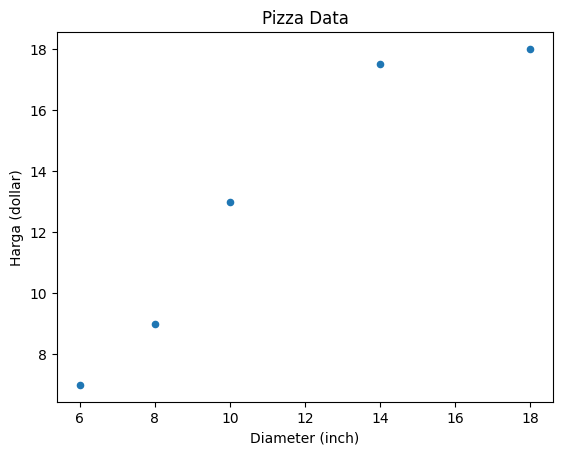

In [ ]:
df.plot(kind='scatter', x='Diameter', y='Price')

plt.title('Pizza Data')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')

plt.show

### **Data Preparation**

In [ ]:
X = np.array(df['Diameter']).reshape(-1, 1)  # Feature (Diameter)
y = np.array(df['Price'])                    # Target (Price)

### **Splitting the Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting Data
X_train = np.array(df[['Diameter']])
y_train = np.array(df['Price'])

X_test = np.array(df[['Diameter']])
y_test = np.array(df['Price'])

### **K-Fold Cross Validation**

In [ ]:
# Define the range of polynomial degrees to test
degrees = range(1, 11)

In [ ]:
# Perform k-fold cross-validation for each degree
mean_scores = []
for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Linear regression model
    model = LinearRegression()

    # Cross-validation
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(-scores.mean())

# Find the best degree based on the minimum mean squared error
best_degree = degrees[np.argmin(mean_scores)]
print("Best degree:", best_degree)

Best degree: 2


In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
X_poly_train

array([[  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,  14., 196.],
       [  1.,  18., 324.]])

### **Creating the Model**

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

### **Make Predictions**

In [ ]:
y_train_pred = poly_model.predict(X_poly_train)
y_test_pred = poly_model.predict(X_poly_test)

### **Model Evaluation**

In [ ]:
# Model Evaluation
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100


print(f'Mean Squared Error :' ,{mse})
print(f'Root Mean Squared Error :' ,{rmse})
print(f'Mean Absolute Error :' ,{mae})
print(f'Mean Absolute Percentage Error :' ,{mape})

Mean Squared Error : {0.35687633262260254}
Root Mean Squared Error : {0.5973912726367892}
Mean Absolute Error : {0.49594882729212453}
Mean Absolute Percentage Error : {4.975077516655451}


### **Visualize the Result**

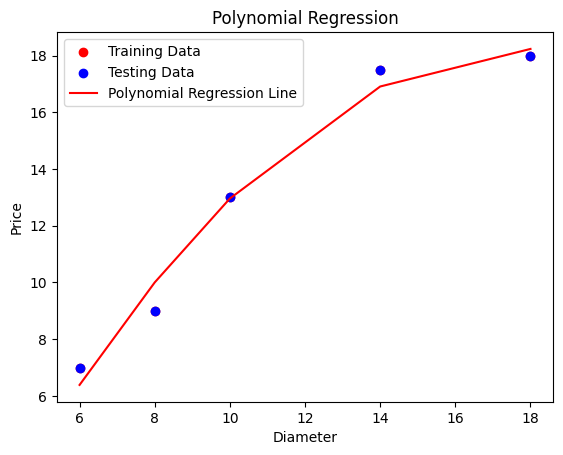

In [ ]:
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.plot(X, poly_model.predict(poly_features.transform(X)), color='red', label='Polynomial Regression Line')
plt.xlabel('Diameter')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

#### **Linear Regression Equation**

**Formula Polynomial Regression** : $y = θ_0 + θ_1 x + θ_2 x^2 .... θ_n x^n$

$Y$ : dependent varible

$X$ : independent variable

$θ_0 , θ_1 , θ_2 ... θ_n$ : the coefficients (parameters) of the polynomial regression model.

In [ ]:
# Get the coefficients
coefficients = poly_model.coef_

# Create the equation string
equation = f"Price = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + {coefficients[i]:.2f} * X^{i}"

print("Polynomial Regression Equation:")
print(equation)

Polynomial Regression Equation:
Price = 0.00 + 2.96 * X^1 + -0.08 * X^2


### **Input New Values**

In [ ]:
# Input data
new_diameters = np.array([9, 12, 15]).reshape(-1, 1)

# Transform new values into polynomial features
new_diameters_poly = poly_features.transform(new_diameters)

# Predict using the polynomial regression model
predicted_prices = poly_model.predict(new_diameters_poly)

# Print the predicted prices
for diameter, price in zip(new_diameters.flatten(), predicted_prices):
    print(f"For a diameter of {diameter}, the predicted price is: ${price:.2f}")


For a diameter of 9, the predicted price is: $11.56
For a diameter of 12, the predicted price is: $15.26
For a diameter of 15, the predicted price is: $17.49
